In [2]:
import os
from matplotlib import pyplot as plt
import numpy as np
from rasterio.merge import merge
import rasterio as rio
from pathlib import Path

In [3]:
try:
    os.chdir('C:/users/claud/Documents/GitHub/proyecto_infotec/datos')
except:
    os.chdir('C:/users/claudio.pacheco/Documents/Github/proyecto_infotec/datos')

In [4]:
#Abrir imagen uno

path = Path('img/')
Path('output').mkdir(parents=True, exist_ok=True)
output_path = 'output/mosaic_output.tif'

In [5]:
raster_files = list(path.iterdir())
raster_to_mosiac = []

In [6]:
raster_files

[WindowsPath('img/gm_2020-01-01-2020_11_30_MX_014012.tif'),
 WindowsPath('img/gm_2020-01-01-2020_11_30_MX_015012.tif'),
 WindowsPath('img/gm_2020-01-01-2020_11_30_MX_015013.tif'),
 WindowsPath('img/gm_2020-01-01-2020_11_30_MX_016012.tif'),
 WindowsPath('img/gm_2020-01-01-2020_11_30_MX_016013.tif'),
 WindowsPath('img/gm_2020-01-01-2020_11_30_MX_017012.tif'),
 WindowsPath('img/gm_2020-01-01-2020_11_30_MX_017013.tif')]

Text(0.1, 0, 'Fuente: INEGI. Geomediana Landsat.')

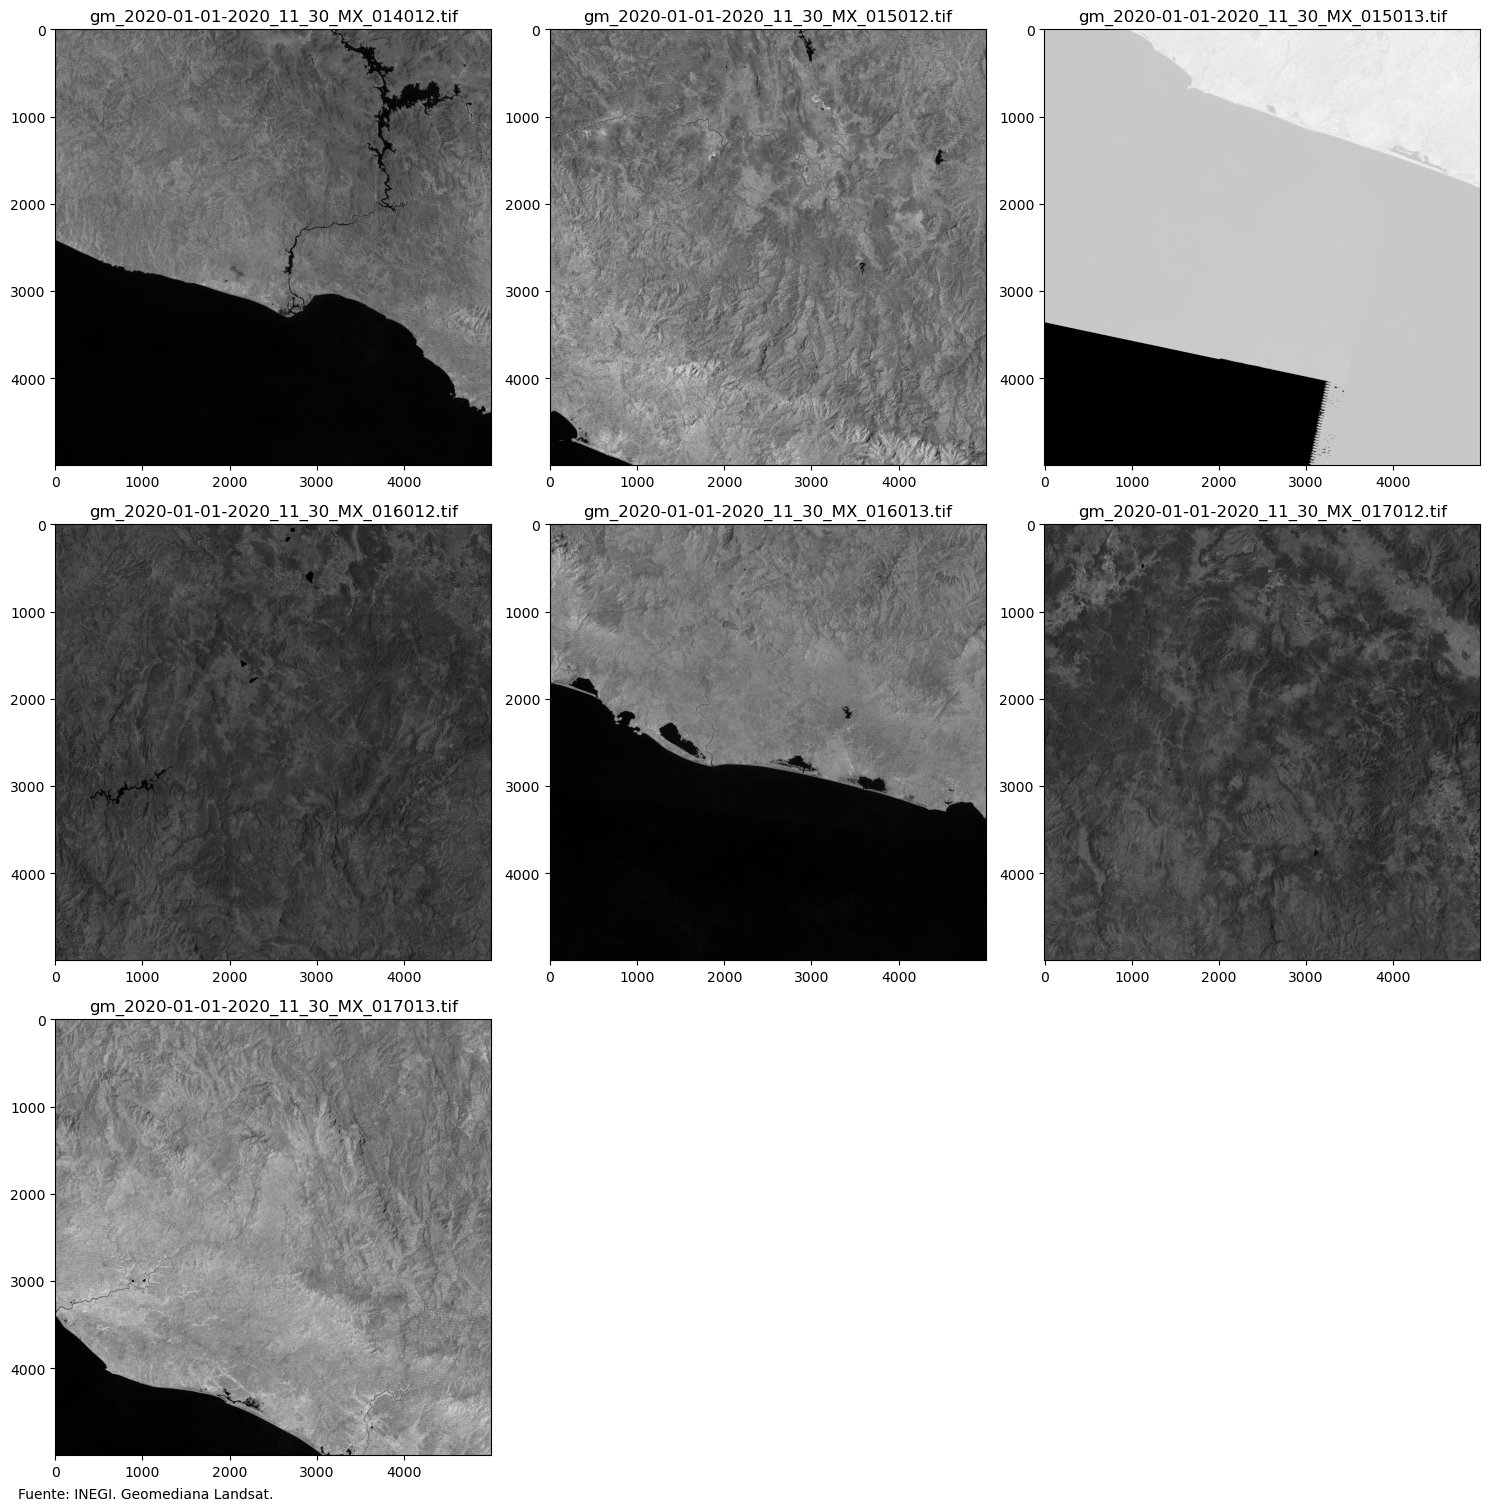

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))  # Create a 3x3 grid of subplots

# Remove the last two (empty) subplots in the third row
plt.delaxes(axs[2,1])
plt.delaxes(axs[2,2])

for i, ax in enumerate(axs.flatten()[:7]):  # Only iterate through the first 7 subplots
    with rio.open(raster_files[i]) as src:
        ax.imshow(src.read(4), cmap='Greys_r')
        ax.set_title(raster_files[i].name)

plt.tight_layout()
fig.text(0.1, 0, 'Fuente: INEGI. Geomediana Landsat.', fontsize=10, ha='center', va='center', transform=fig.transFigure)



In [ ]:
for p in raster_files:
    raster = rio.open(p)
    raster_to_mosiac.append(raster)

In [ ]:
mosaic, output = merge(raster_to_mosiac)

In [ ]:
output_meta = raster.meta.copy()
output_meta.update(
    {"driver": "GTiff",
        "height": mosaic.shape[1],
        "width": mosaic.shape[2],
        "transform": output,
    }
)

In [ ]:
with rio.open(output_path, "w", **output_meta) as m:
    m.write(mosaic)

In [ ]:
#Plotear el mosaico generado
with rio.open(output_path) as src:
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(src.read(4), cmap='pink')
    ax.set_title('Mosaico generado con las imágenes Geomediana Landsat, 2020', fontsize=20,fontweight='bold')
    #ax.set_axis_off()
plt.text(0,0.2, 'Fuente: Elaboración propia con datos de INEGI. Geomediana Landsat.', fontsize=10, ha='center', va='center', transform=fig.transFigure)

In [ ]:
image_path="output/mosaic_output.tif"
imagen=rio.open(image_path)

In [ ]:
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

In [ ]:
nir=imagen.read(5)
red=imagen.read(6)
green=imagen.read(4)

In [ ]:
#Normalizar 
nir_norm=normalize(nir)
red_norm=normalize(red)
green_norm=normalize(green)

In [ ]:
#Combinar bandas
nrg=np.dstack((nir_norm,red_norm,green_norm))
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(nrg, cmap='pink')
ax.set_title('Combinación de bandas 5,6,4', fontsize=20,fontweight='bold')
plt.text(0,0.2, 'Fuente: Elaboración propia con datos de INEGI. Geomediana Landsat.', fontsize=10, ha='center', va='center', transform=fig.transFigure)


In [ ]:
nrg_transposed = nrg.transpose((2, 0, 1))
# Then save it using rasterio
with rio.open('output/uso_suelo.tif', 'w', driver='GTiff',
                   height=nrg_transposed.shape[1], width=nrg_transposed.shape[2],
                   count=3, dtype=nrg_transposed.dtype,
                   crs=imagen.crs, transform=imagen.transform) as dst:
    dst.write(nrg_transposed, indexes=[1, 2, 3])